#  Collecting Data  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exploratory Data Analysis 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Visualization 

In [10]:
sns.set() #setting seaborn default for plots

#### Bar Chart for Categorical features 

#### Pclass, Sex, SibSp (# of siblings or spouse), #Parch (# of parent or children), Embarked, Cabin 

In [23]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()    
    df = pd.DataFrame([survived,dead])
    df.plot(kind='bar', stacked=True, figsize=(10,5))

In [56]:
def facet_grid(feature,mini=0, maxi=100):
    facet = sns.FacetGrid(train,hue='Survived', aspect=4)
    facet.map(sns.kdeplot, feature, shade = True)
    facet.set( xlim= (mini , maxi ))
    facet.add_legend()

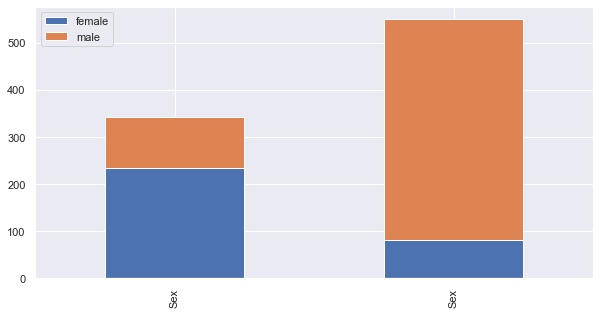

In [24]:
bar_chart('Sex')

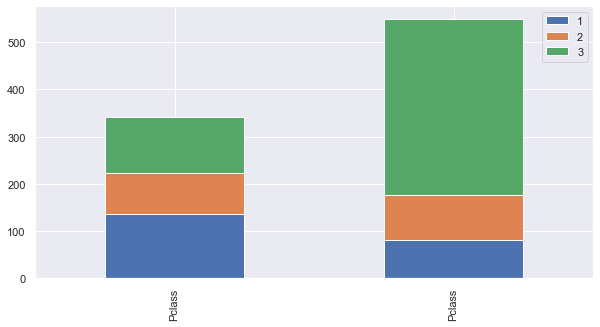

In [25]:
bar_chart('Pclass')

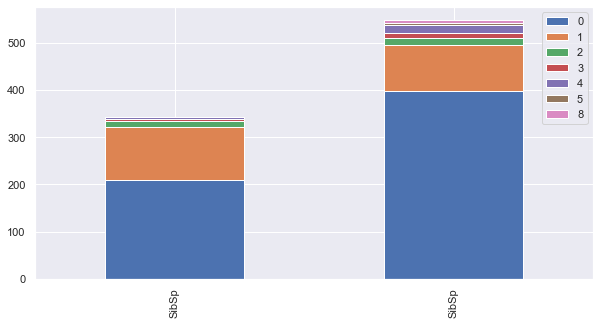

In [26]:
bar_chart('SibSp')

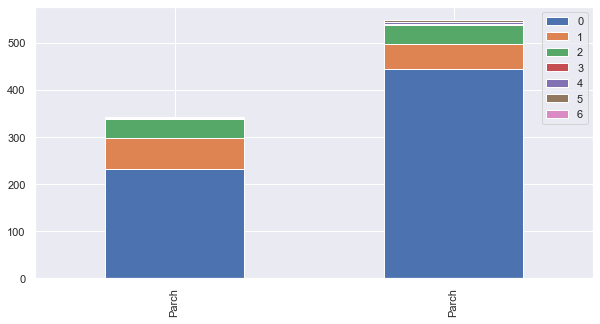

In [27]:
bar_chart('Parch')

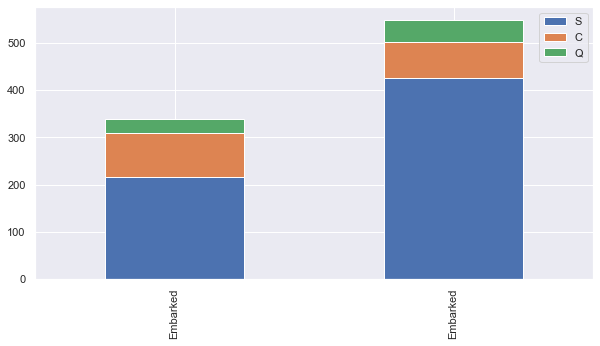

In [28]:
bar_chart('Embarked')

# Feature Engineering 

In [17]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Name 

In [18]:
train_test_data = [train,test] #combining train test data

for dataset in train_test_data:
    dataset['title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand= False)

In [19]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Capt          1
Lady          1
Don           1
Ms            1
Mme           1
Countess      1
Sir           1
Name: title, dtype: int64

In [20]:
test['title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: title, dtype: int64

In [21]:
titles = set(train['title'].unique())
titles.update(test['title'].unique())
titles

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [22]:
title_mapping = {}

for t in titles:
    kk=-1
    if t == 'Mr':
        kk=0
    elif t=='Miss':
        kk=1
    elif t == 'Mrs':
        kk=2
    elif t == 'Master':
        kk=3
    else:
        kk=4
    title_mapping[t] = kk
    
for dataset in train_test_data:
    dataset['title'] = dataset['title'].map(title_mapping)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


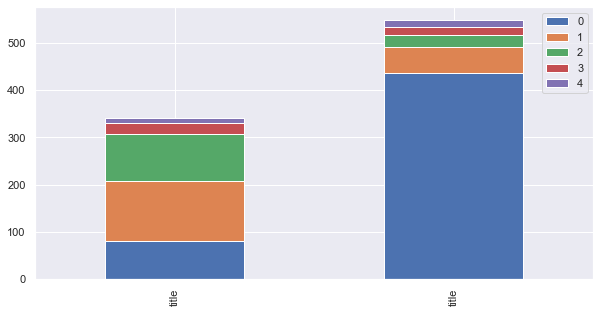

In [29]:
bar_chart('title')

In [30]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [36]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### Sex

In [32]:

sex = pd.get_dummies(train['Sex'])
train = train.join(sex)    

# sex = pd.get_dummies(X_full['Sex'])
# X_full = X_full.join(sex)

In [33]:
train.drop('male',axis=1, inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,female
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [35]:
train.drop('Sex',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,female
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,0,0


In [36]:
sex = pd.get_dummies(test['Sex'])
test = test.join(sex)
test.drop('Sex',axis=1,inplace=True)
test.drop('male',axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,female
0,892,3,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,47.0,1,0,363272,7.0000,NaN,S,2,1
2,894,2,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,22.0,1,1,3101298,12.2875,NaN,S,2,1


### Age 

In [37]:
# train['Age'].fillna(train.groupby('female')['Age'].transform("mean"), inplace=True)
# test['Age'].fillna(test.groupby('female')['Age'].transform("mean"), inplace=True)

train['Age'].fillna(train.groupby('title')['Age'].transform("mean"), inplace=True)
test['Age'].fillna(test.groupby('title')['Age'].transform("mean"), inplace=True)

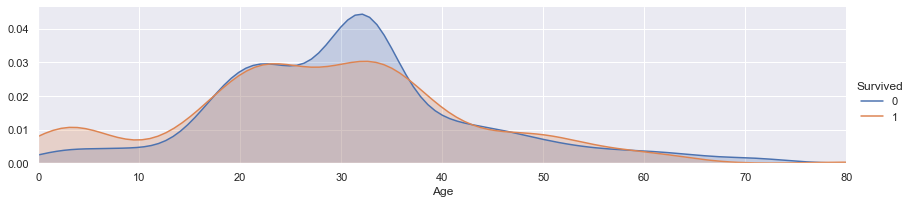

In [38]:
facet = sns.FacetGrid(train,hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0, train.Age.max()))
facet.add_legend()

plt.show()

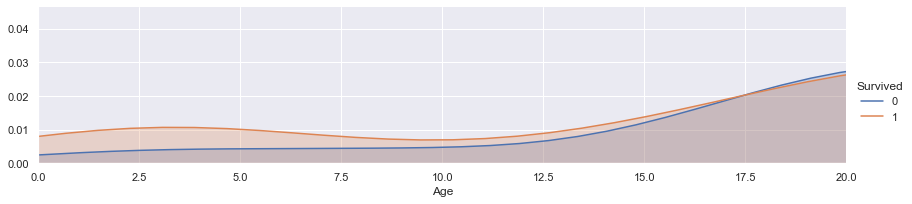

In [39]:
facet = sns.FacetGrid(train,hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0, 20))
facet.add_legend()


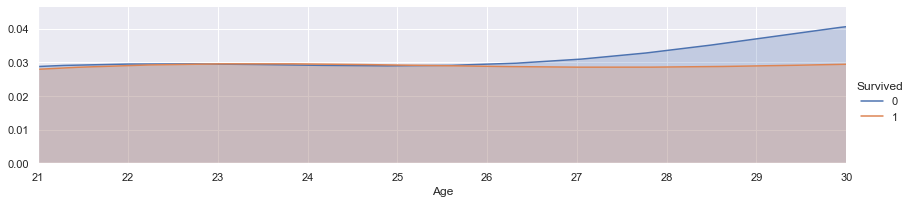

In [41]:
facet = sns.FacetGrid(train,hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (21, 30))
facet.add_legend()


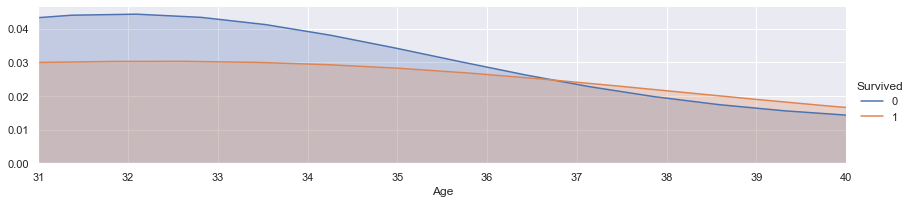

In [42]:
facet = sns.FacetGrid(train,hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (31, 40))
facet.add_legend()


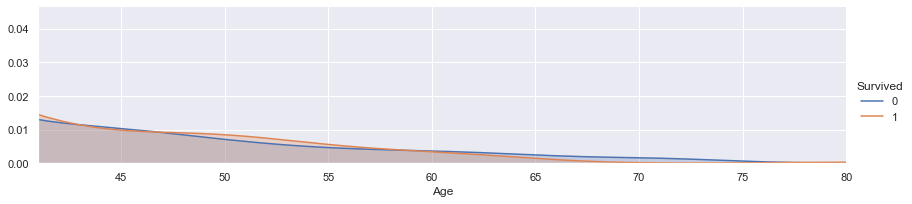

In [43]:
facet = sns.FacetGrid(train,hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (41, 80))
facet.add_legend()


### Binning Age

binning numerical age to categorical value
feature vector map:
    
    -child : 0
    -young : 1
    -adult : 2
    -mid-age : 3
    -senior : 4

In [48]:
train_test_data = [train, test]

for dataset in train_test_data :
    dataset.loc[(dataset['Age'] <= 16), 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26) , 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36) , 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62) , 'Age'] = 3
    dataset.loc[(dataset['Age'] > 62 ), 'Age'] = 4
    

In [49]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,female
0,1,0,3,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,2.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,2.0,0,0,373450,8.0500,NaN,S,0,0


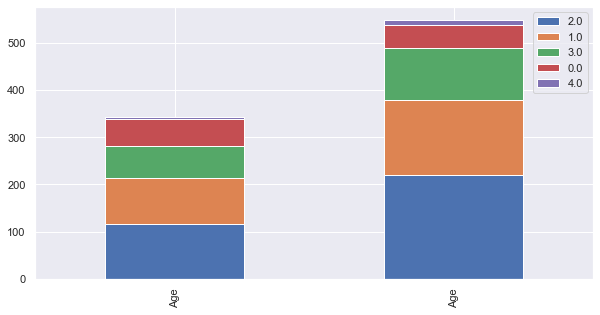

In [50]:
bar_chart('Age')

### Embarked

In [51]:
train.Embarked.fillna("S",inplace=True)
test.Embarked.fillna("S",inplace=True)

In [52]:
Embarked = pd.get_dummies(test['Embarked'])
test = test.join(Embarked)
test.drop('Embarked',axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,title,female,C,Q,S
0,892,3,2.0,0,0,330911,7.8292,NaN,0,0,0,1,0
1,893,3,3.0,1,0,363272,7.0000,NaN,2,1,0,0,1
2,894,2,3.0,0,0,240276,9.6875,NaN,0,0,0,1,0
3,895,3,2.0,0,0,315154,8.6625,NaN,0,0,0,0,1
4,896,3,1.0,1,1,3101298,12.2875,NaN,2,1,0,0,1


In [53]:
Embarked = pd.get_dummies(train['Embarked'])
train = train.join(Embarked)
train.drop('Embarked',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,title,female,C,Q,S
0,1,0,3,1.0,1,0,A/5 21171,7.2500,NaN,0,0,0,0,1
1,2,1,1,3.0,1,0,PC 17599,71.2833,C85,2,1,1,0,0
2,3,1,3,1.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,1
3,4,1,1,2.0,1,0,113803,53.1000,C123,2,1,0,0,1
4,5,0,3,2.0,0,0,373450,8.0500,NaN,0,0,0,0,1


In [46]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
title            0
female           0
C                0
Q                0
S                0
dtype: int64

In [47]:
test.isnull().sum()

PassengerId      0
Pclass           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
title            0
female           0
C                0
Q                0
S                0
dtype: int64

## Fare

In [48]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform("median"), inplace=True)

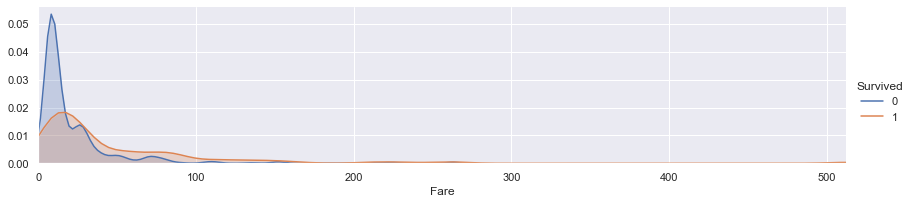

In [57]:
facet_grid('Fare',0, train.Fare.max())

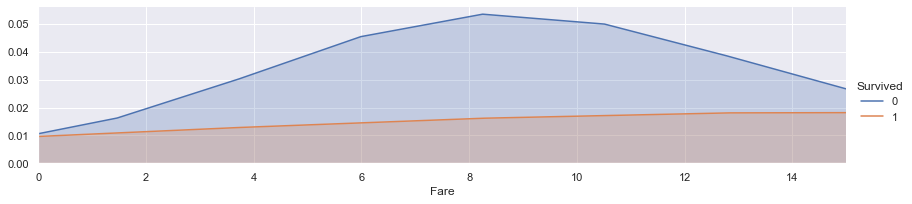

In [59]:
facet_grid('Fare',0, 15)

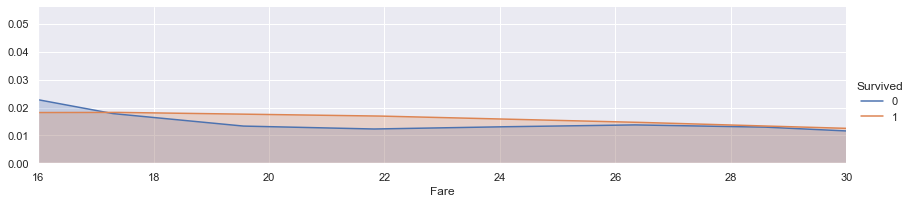

In [61]:
facet_grid('Fare',16, 30)

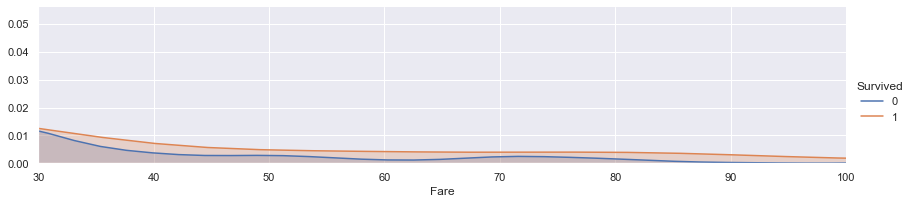

In [62]:
facet_grid('Fare',30, 100)

In [63]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] <= 17), 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & ( dataset['Fare'] <= 30 ) , 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & ( dataset['Fare'] <= 100 ) , 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 100)  , 'Fare'] = 3            

In [64]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,title,female,C,Q,S
0,1,0,3,1.0,1,0,A/5 21171,0.0,NaN,0,0,0,0,1
1,2,1,1,3.0,1,0,PC 17599,2.0,C85,2,1,1,0,0
2,3,1,3,1.0,0,0,STON/O2. 3101282,0.0,NaN,1,1,0,0,1
3,4,1,1,2.0,1,0,113803,2.0,C123,2,1,0,0,1
4,5,0,3,2.0,0,0,373450,0.0,NaN,0,0,0,0,1


## Cabin

In [66]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
C22 C26        3
              ..
C103           1
E63            1
D30            1
C111           1
E34            1
Name: Cabin, Length: 147, dtype: int64

In [50]:
# train.drop('Cabin',axis=1,inplace=True)
# test.drop('Cabin',axis=1,inplace=True)

In [67]:
for dataset in train_test_data :
    dataset['Cabin'] = dataset['Cabin'].str[:1]

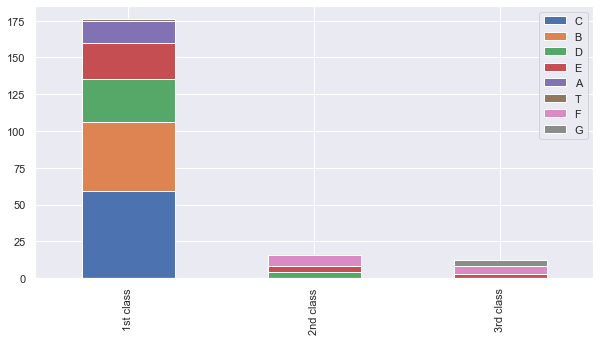

In [69]:
pcl1 = train[ train['Pclass'] ==1 ]['Cabin'].value_counts()
pcl2 = train[ train['Pclass'] ==2 ]['Cabin'].value_counts()
pcl3 = train[ train['Pclass'] ==3 ]['Cabin'].value_counts()

df = pd.DataFrame([pcl1,pcl2, pcl3])
df.index = ["1st class" , "2nd class", "3rd class"]
df.plot(kind='bar', stacked=True, figsize= (10,5))

In [70]:
cabin_mapping ={ "A":0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E':1.6, 'F': 2, 'G':2.4 , 'T': 2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,title,female,C,Q,S
0,1,0,3,1.0,1,0,A/5 21171,0.0,NaN,0,0,0,0,1
1,2,1,1,3.0,1,0,PC 17599,2.0,0.8,2,1,1,0,0
2,3,1,3,1.0,0,0,STON/O2. 3101282,0.0,NaN,1,1,0,0,1
3,4,1,1,2.0,1,0,113803,2.0,0.8,2,1,0,0,1
4,5,0,3,2.0,0,0,373450,0.0,NaN,0,0,0,0,1


In [54]:
train.drop('Ticket',axis=1, inplace=True)

In [72]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace= True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace= True)

## Family Size

In [73]:
train_test_data = [train, test]

for dataset in train_test_data :
    dataset['Family_Size'] = dataset["SibSp"] + dataset["Parch"] + 1

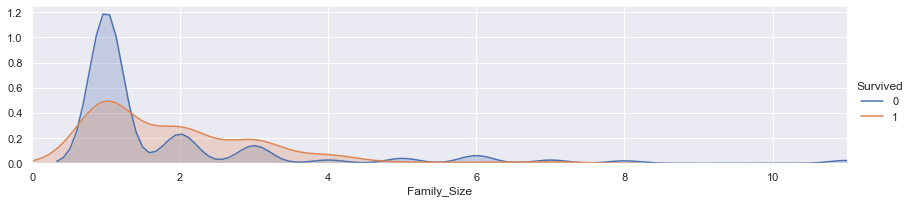

In [74]:
facet_grid('Family_Size', 0, train.Family_Size.max())

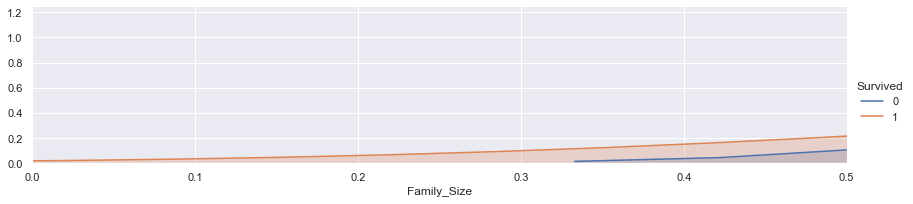

In [77]:
facet_grid('Family_Size', 0, .5)

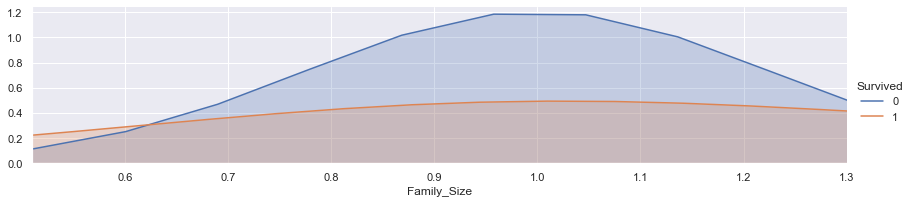

In [80]:
facet_grid('Family_Size', 0.51, 1.3)

In [82]:
family_mapping = {1: 0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4.0}

for dataset in train_test_data:
    dataset['Family_Size'] = dataset['Family_Size'].map(family_mapping)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,title,female,C,Q,S,Family_Size
0,1,0,3,1.0,1,0,A/5 21171,0.0,2.0,0,0,0,0,1,0.4
1,2,1,1,3.0,1,0,PC 17599,2.0,0.8,2,1,1,0,0,0.4
2,3,1,3,1.0,0,0,STON/O2. 3101282,0.0,2.0,1,1,0,0,1,0.0
3,4,1,1,2.0,1,0,113803,2.0,0.8,2,1,0,0,1,0.4
4,5,0,3,2.0,0,0,373450,0.0,2.0,0,0,0,0,1,0.0


In [88]:
# train.drop('title',axis=1, inplace=True)
feature_drop = ['Ticket', 'SibSp', 'Parch']

# train_test_data = [train, test]

for dataset in train_test_data:
    dataset.drop(feature_drop, axis=1, inplace= True)

In [89]:
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Cabin,title,female,C,Q,S,Family_Size
0,1,0,3,1.0,0.0,2.0,0,0,0,0,1,0.4
1,2,1,1,3.0,2.0,0.8,2,1,1,0,0,0.4
2,3,1,3,1.0,0.0,2.0,1,1,0,0,1,0.0
3,4,1,1,2.0,2.0,0.8,2,1,0,0,1,0.4
4,5,0,3,2.0,0.0,2.0,0,0,0,0,1,0.0


In [90]:
train.drop('PassengerId',axis=1, inplace=True)

In [91]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train.shape, target.shape

((891, 11), (891,))

In [43]:
# test.drop('title',axis=1, inplace=True)

In [93]:
# test.drop('Ticket',axis=1, inplace=True)
train_data.head(10)

,Pclass,Age,Fare,Cabin,title,female,C,Q,S,Family_Size
0,3,1.0,0.0,2.0,0,0,0,0,1,0.4
1,1,3.0,2.0,0.8,2,1,1,0,0,0.4
2,3,1.0,0.0,2.0,1,1,0,0,1,0.0
3,1,2.0,2.0,0.8,2,1,0,0,1,0.4
4,3,2.0,0.0,2.0,0,0,0,0,1,0.0
5,3,2.0,0.0,2.0,0,0,0,1,0,0.0
6,1,3.0,2.0,1.6,0,0,0,0,1,0.0
7,3,0.0,1.0,2.0,3,0,0,0,1,1.6
8,3,2.0,0.0,2.0,2,1,0,0,1,0.8
9,2,0.0,2.0,1.8,2,1,1,0,0,0.4


# Modelling 

In [94]:
#importing classifier modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np


In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   Cabin        891 non-null    float64
 4   title        891 non-null    int64  
 5   female       891 non-null    uint8  
 6   C            891 non-null    uint8  
 7   Q            891 non-null    uint8  
 8   S            891 non-null    uint8  
 9   Family_Size  891 non-null    float64
dtypes: float64(4), int64(2), uint8(4)
memory usage: 45.4 KB


In [96]:
train_data.shape, test.shape

((891, 10), (418, 11))

##  Cross Validation (K-fold)  

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state= 0)


## Random Forest 

In [98]:
scoring = 'f1'
def get_score(n_est):
    rf_clf = RandomForestClassifier(n_estimators=n_est)
    score = cross_val_score(rf_clf,train_data, target, cv= k_fold, n_jobs=1 , scoring=scoring)
    return np.mean(score)

In [99]:
keys = [50*i for i in range(1,9)]

scores = {}

for key in keys:
    scores[key] = get_score(key)

In [100]:
scores

{50: 0.75143265696924,
 100: 0.7482067297269211,
 150: 0.7438293939532643,
 200: 0.7476915361321803,
 250: 0.742736492853819,
 300: 0.7430829154456198,
 350: 0.749858581409122,
 400: 0.7511064955225728}

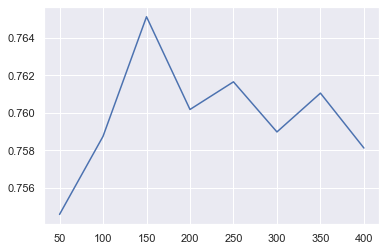

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

###### we can see from graph that n = 150 will give us optimal score

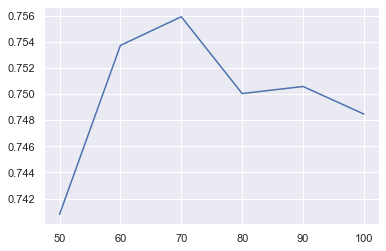

In [151]:
scores = {}

for key in [50,60,70,80,90,100]:
    scores[key] = get_score(key)


plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

# Testing

In [52]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(train_data,target)

RandomForestClassifier(n_estimators=150)

In [53]:
pred = clf.predict(test)

In [54]:
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived" : pred
})

submission.to_csv("submission_rf150.csv", index = False)

# XGBooster

In [55]:
from xgboost import XGBRFClassifier
from sklearn.model_selection import train_test_split

In [97]:
x_tr, x_te, y_tr, y_te = train_test_split(train_data,target,train_size =0.8,test_size=0.2,random_state=0)

In [98]:
my_model = XGBRFClassifier(n_estimator=300, learning_rate=0.02)

In [99]:
my_model.fit(x_tr,y_tr,early_stopping_rounds = 5, eval_set = [(x_te,y_te)],verbose = False)

[21:43:56] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.02,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimator=300, n_estimators=100,
                n_jobs=0, num_parallel_tree=100, objective='binary:logistic',
                random_state=0, reg_alpha=0, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
prediction = my_model.predict(x_te)

In [101]:
from sklearn.metrics import accuracy_score,f1_score

In [102]:
accuracy_score(prediction,y_te)

0.8379888268156425

In [103]:
f1_score(prediction,y_te)

0.7679999999999999

In [104]:
pred = my_model.predict(test)

In [105]:
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived" : pred
})

submission.to_csv("submission_xgbooster.csv", index = False)